In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('loan.csv')

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We have 614 rows and 13 columns, we need to analyse the daata before we jump into any other process hence have to go through dtypes, unique values and other details to sort them out.

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have 5 columns which are numeric and others are object variables.

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We have a column Loan ID in which every column is having a different value and hence will not contribute much to the data. we will remove that column.

In [9]:
df=df.drop(columns='Loan_ID')

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Now we caan define each column based on initial check that we make.

1. Gender - Whether the person who has applied is male or female.

2. Married - Whether the person is married or not.

3. Dependents - How many dependents does the users have?

4. Education - The level of education that any person is having.

5. Self_Employed - Whether the running a business or not.

6. ApplicantIncome - What is the income that the person draws assuming the income to be monthly.

7. CoApplicantIncome - The income of the person who is the nominee or the guaranteer of the person applying for a loan.

8. Loan amount - The amount of loan.

9. Loan term - The duration of the loan.

10. credit history - the history of previous transactions.

11. Property Area - Whether the person lives in urban rural or others.

12. Loan status - whether the person has got loan or not.

Checking the number of null values

In [11]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In credit history, we have 50 values, in Loan amount term 14, 22 in Loam amount, 32 in Self employed and 15 3 and 13 in Dependents, married and Gender respectively, we will have to treat them to make sure that we are having a clean data.

Let us try to see if all the null values are in same columns or different

<AxesSubplot:>

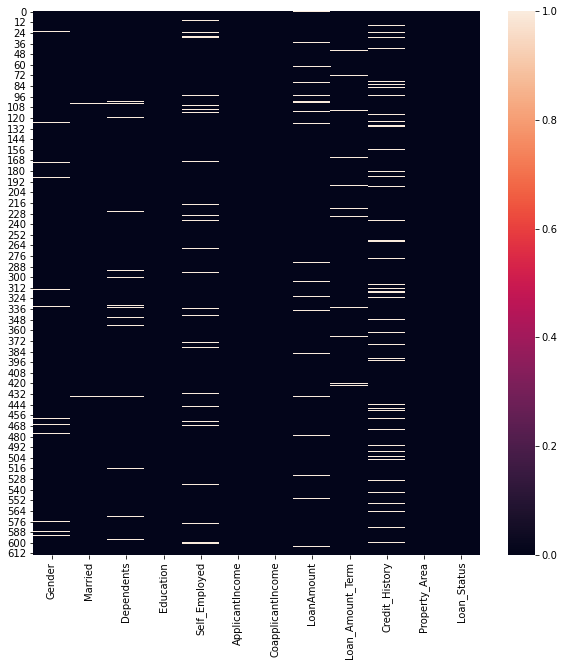

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

As there are many variables that is in null, if we try to remove the data, there is a possibility that the loss is more, hence considering to impute all the columns.

Imputing the data's at this stage might give us an incorrect data for visualisation hence let us first visualise the data and then we will move ahead with the imputation and ecoding part just before modelling stage.

Spliiting the data to categorical and numerical for better clarity.

In [13]:
cat=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

Though Credit history is in numerical in the dtypes but when we see, it is actually a categorical variable as it is only having 0 and 1 as its types. hence considering the categorical and numerical variable based on basic analysis.

Male      489
Female    112
Name: Gender, dtype: int64


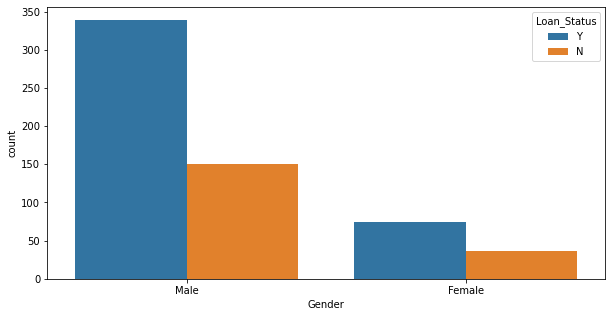

Yes    398
No     213
Name: Married, dtype: int64


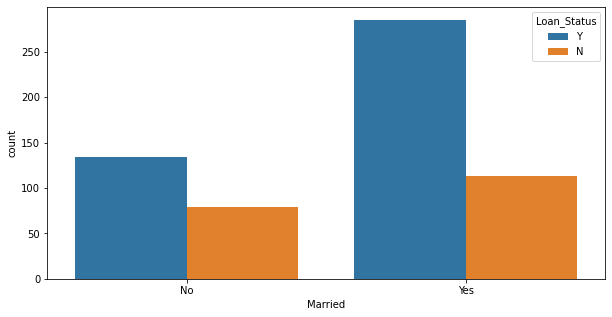

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


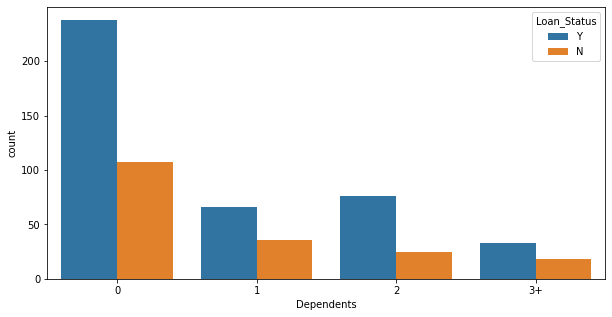

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


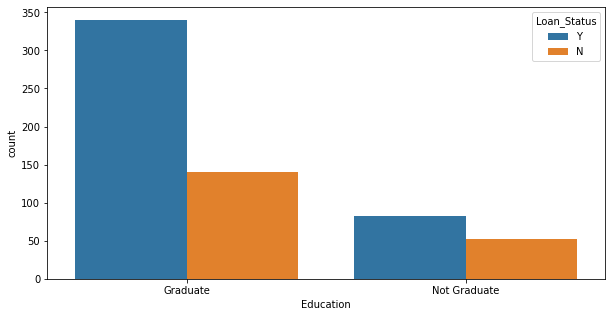

No     500
Yes     82
Name: Self_Employed, dtype: int64


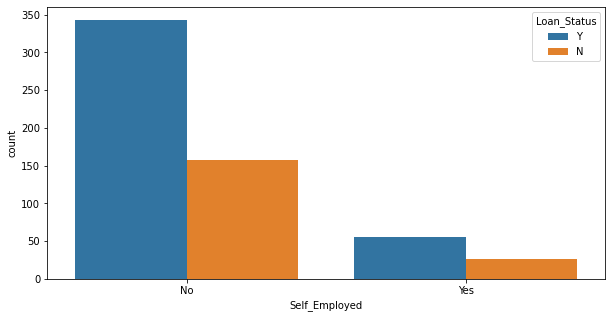

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


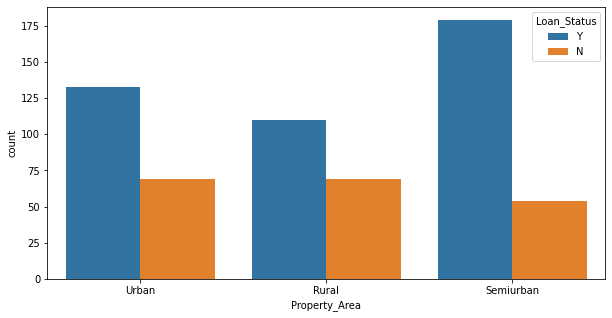

1.0    475
0.0     89
Name: Credit_History, dtype: int64


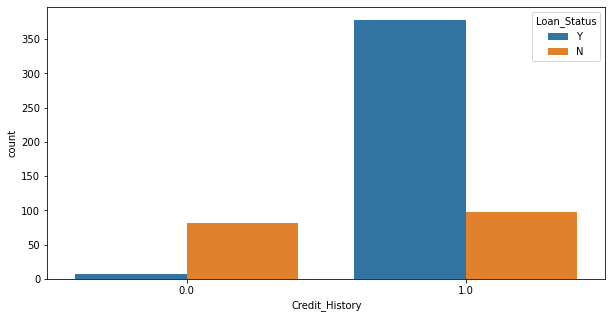

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


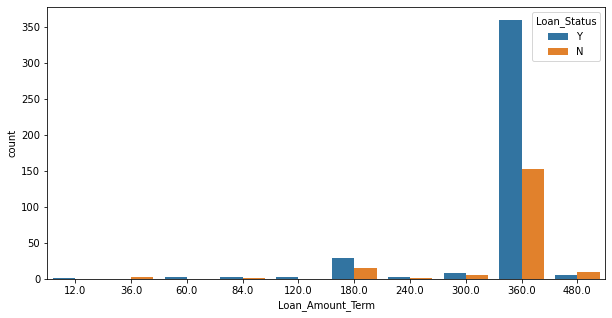

In [14]:
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, hue='Loan_Status', data=df)
    print(df[i].value_counts())
    plt.show()

1. Comparing the genders, males have got loan than the females.

2. The people who are married are tend to get loan than unmarried.

3. The people having no dependants are more likely to get the loan.

4. Mostly, Graduates gets the loan

5. People who are not selfemployed tends to get loan compared to others.

6. People in Semi urban tends to get loan.

7. People having credit history ass 0 do not get much loan.

8. With the increase in loan term, the chance to get loan increases.


In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

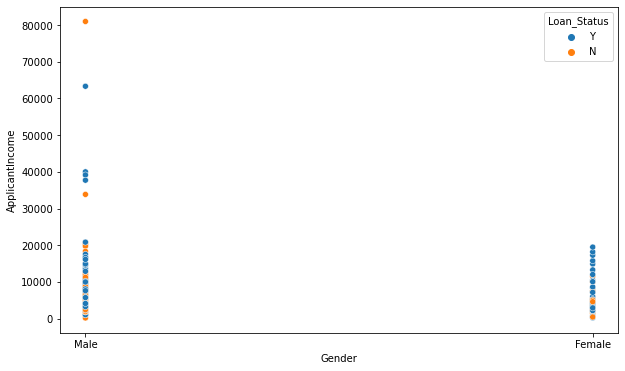

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Gender',y='ApplicantIncome',hue='Loan_Status')
plt.show()

If the applicant income is 80K and they are male, there is a lesser possibility that the person gets a loan. and with the increment in the income for female we can see a trent where they gets the loan approved.

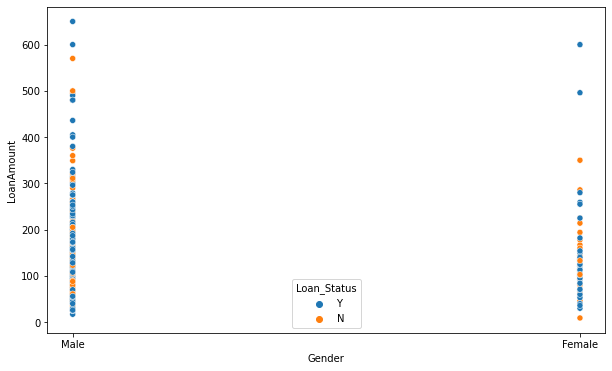

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Gender',y='LoanAmount',hue='Loan_Status')
plt.show()

This is evident that the number of loan application mostly comes from Male and less from female

The number varies dependin on other factors which we will identify.

Let us impute the loan_status column to get a better visualisation to work on catplot.

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
enc=OrdinalEncoder()
df['Loan_Status']=enc.fit_transform(df['Loan_Status'].values.reshape(-1,1))

In [20]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1.0


Here, 1 is approved and 0 is not approved.

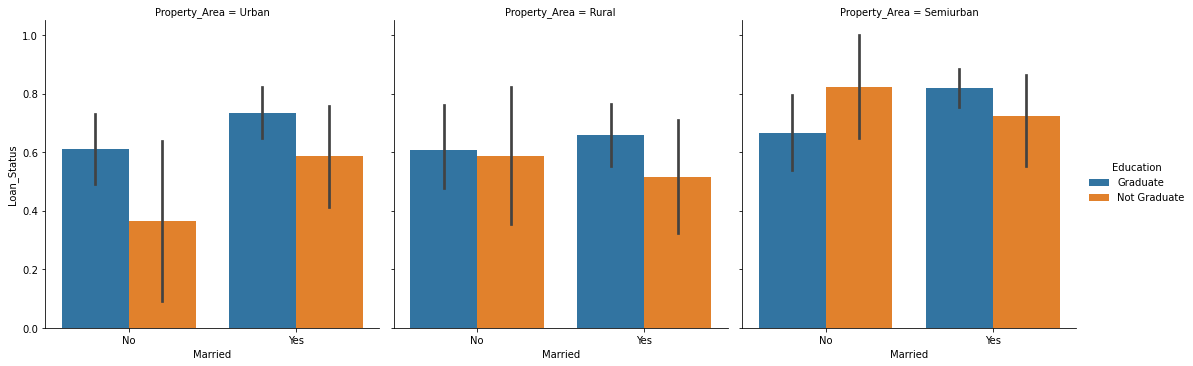

In [21]:
sns.catplot(x='Married',y='Loan_Status',kind='bar',data=df,col='Property_Area',hue='Education')

In Rural area - Married status doesn't make any difference in loan approval


In other areas loan approval chances are more if you are married.

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

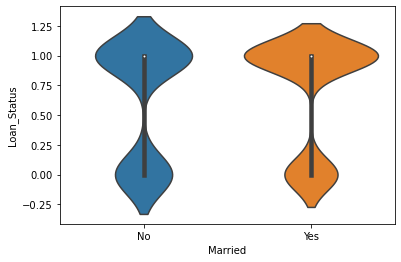

In [22]:
sns.violinplot(x='Married',y='Loan_Status',data=df)

If you are married, you might get a loan compared to a bachelor.

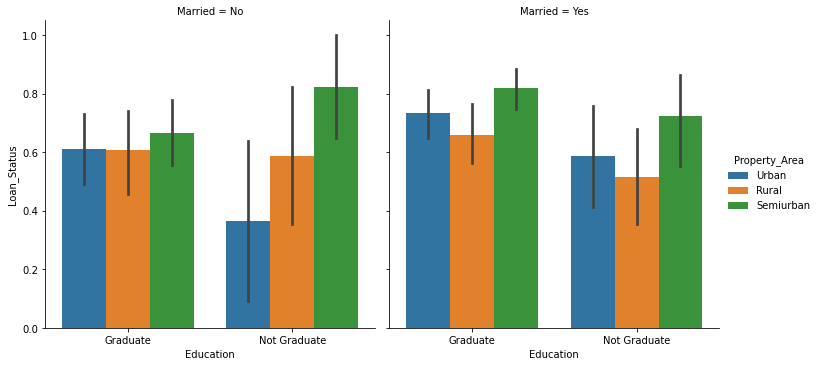

In [23]:
sns.catplot(x='Education',y='Loan_Status',kind='bar',data=df,col='Married',hue='Property_Area')

If you live in Urban and are a non graduate and unmarried, chances are very less that you get a loan.

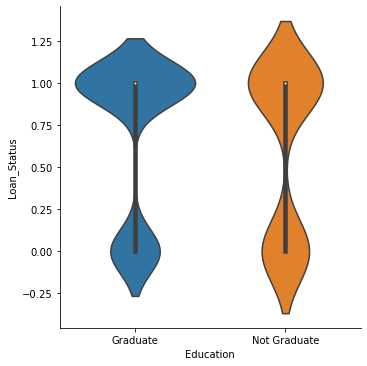

In [24]:
sns.catplot(x='Education',y='Loan_Status',kind='violin',data=df)

If you are a graduate, you might get a higher chance to get a loan.


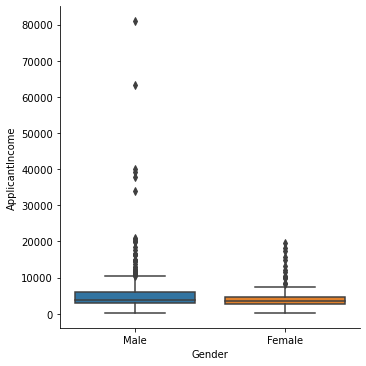

In [25]:
sns.catplot(x='Gender',y='ApplicantIncome',data=df,kind='box')

Income for male is higher than females who applies for a loan.

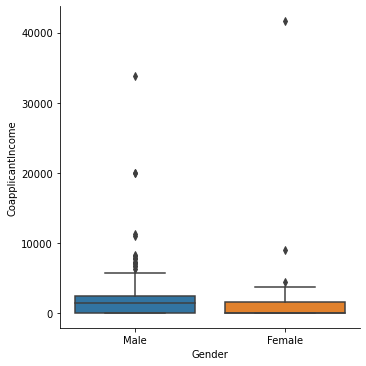

In [26]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=df,kind='box')

For coapplicant as well, the income is more for male comparitively.

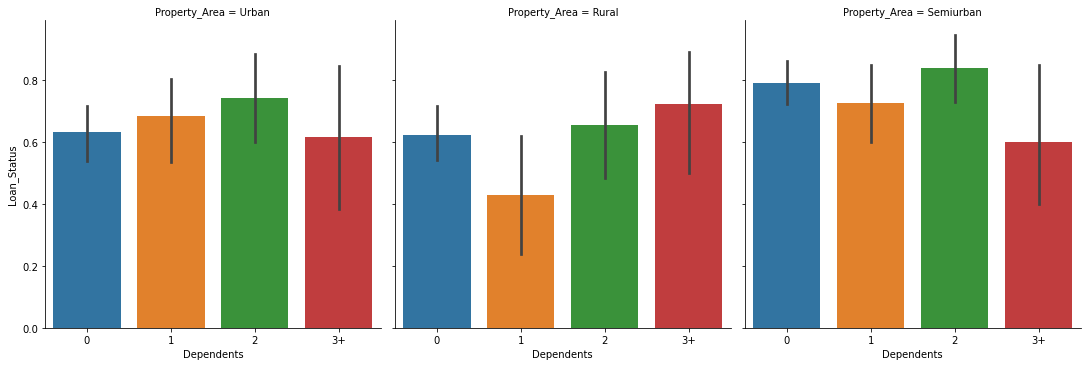

In [27]:
sns.catplot(x='Dependents',y='Loan_Status',kind='bar',data=df,col='Property_Area')

In urban = if you have 2 dependants, there are chances that the loan gets approved compared to 0, 1 and 3+

In Rural = if you have 3+ dependants, there are chances that the loan gets approved compared to 0, 1 and 2

In SemiUrban = if you have 2 dependants, there are chances that the loan gets approved compared to 0, 1 and 3+

Overall, having 2 kids makes you eligible for a loan.

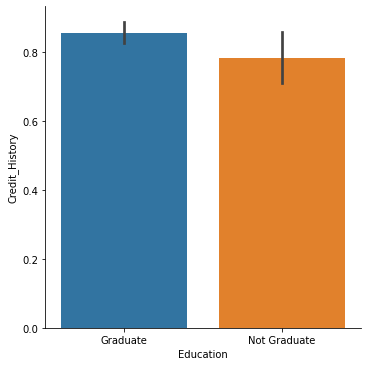

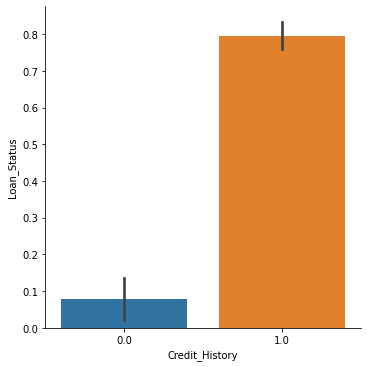

In [28]:
sns.catplot(x='Education',y='Credit_History',kind='bar',data=df)
sns.catplot(x='Credit_History',y='Loan_Status',kind='bar',data=df)

If you are a graduate, the credit history is most likely to be 1.

If the credit history is 1, you have a high chance to get the loan.

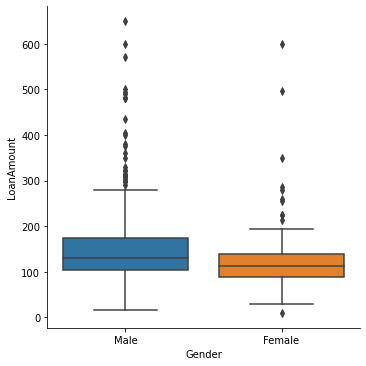

In [29]:
sns.catplot(x='Gender',y='LoanAmount',data=df,kind='box')

Male tend to take more loan than Female

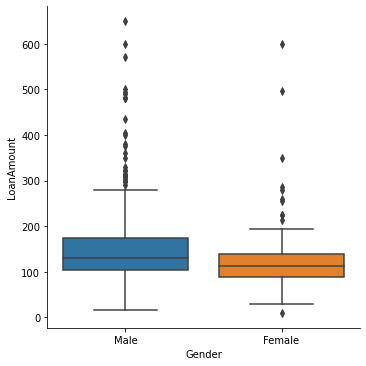

In [30]:
sns.catplot(x='Gender',y='LoanAmount',data=df,kind='box')

Loan amount for male is slightly higher.

Moving ahead with imputation.

Initially let us fill the values of na using fill na.

In [31]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer
mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Gender']=mode.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=mode.fit_transform(df['Married'].values.reshape(-1,1))
df['Self_Employed']=mode.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Credit_History']=mode.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Dependents']=mode.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Loan_Amount_Term']=mode.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['LoanAmount']= df['LoanAmount'].fillna(np.mean(df['LoanAmount']))


In [34]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have the na values replaced.

Correlation

<AxesSubplot:>

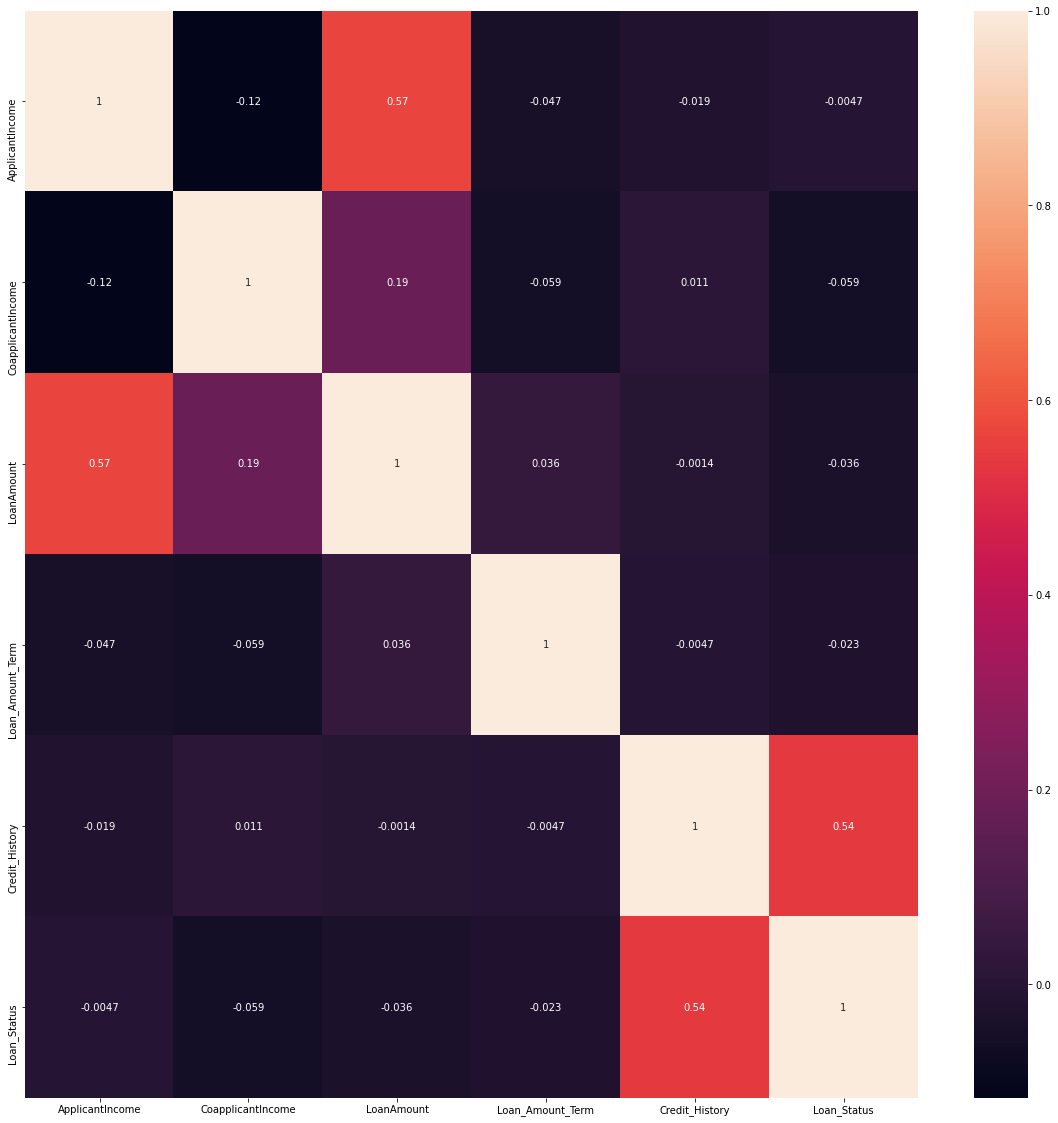

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Loan status us highly correlated to Loan_status.

Loan amount and applicant income is highly correlated, meaning the more the applicant income, the more will be the loan amount.

Gender, dependents anad married are correlated with each other.

Apart from these, there are not much data which shows positive or negative correlation.

Describe

In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


There are 614 columns Where we can take the details for the numerical columns.

Applicant income: Mean = 5403
                  Max  = 8100

        
Coapplicant income: Mean = 1621
                    Max  = 41667


Loan amount : Mean = 146.412
              Max  = 700
        

In [37]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status          float64
dtype: object

In [38]:
# We have already created instances above
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

Now we have all the data in numeric format.

Now we can go ahead just to check the skewness using the distplot and also the possible outliers in the data.

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


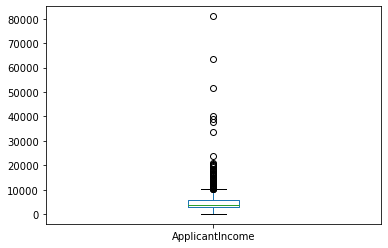

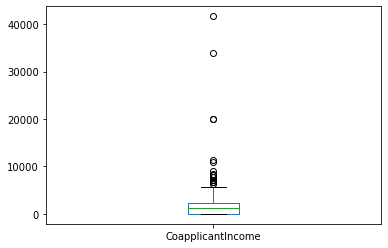

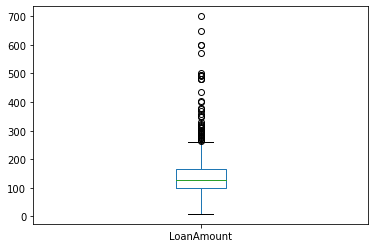

In [41]:
for i in num:
    df[i].plot.box()
    plt.show()

We are able to see here that in all the columns, there are outliers, checking the details on the outliers.


In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [43]:
df.shape

(614, 12)

In [44]:
dfn = df[(z<3).all(axis=1)]
print(df.shape)
print(dfn.shape)


(614, 12)
(577, 12)


In [45]:
# percentage of data loss.
data_loss = ((614-577)/614)*100
data_loss

6.026058631921824

5.6% data is something we can afford and hence we will go ahead dfn.

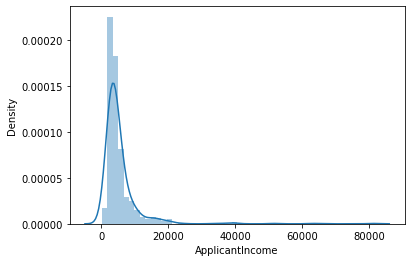

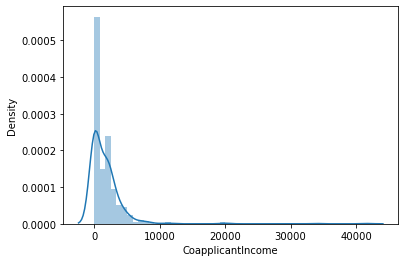

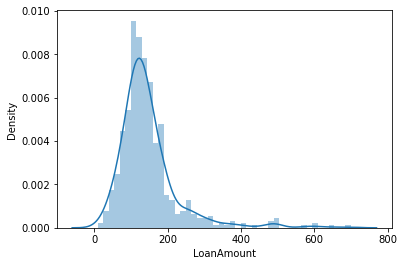

In [46]:
for i in num:
    sns.distplot(df[i])
    plt.show()

We are able to see here that there are skewness in the numerical daata which we will remove verysoon.

Split

In [47]:
x=dfn.drop(columns='Loan_Status')
y=dfn['Loan_Status']

In [48]:
y.shape

(577,)

In [49]:
x.shape

(577, 11)

Checking skewness

In [50]:
dfn.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Here Loan amount, Loan amount term and income are skewed, we have to remove the skewness to get a better data.

In [51]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [52]:
cl=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [53]:
from sklearn.preprocessing import PowerTransformer
pwr=PowerTransformer(method='yeo-johnson')
x=pwr.fit_transform(x)
x=pd.DataFrame(x,columns=cl)

In [54]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


In [55]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

In the numerical variables, the skewness has been removed now, as there is a big difference in the income section and the loam amount, it will be better if we standardise the data before moving ahead with modelling.

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x, columns = cl)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


Modelling

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
lr = LogisticRegression()
gnb=GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [67]:
model=[lr,knc,dtc,svc,rf,ada,gnb]
for m in model:
    print('The model is: ',m)
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
    print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
    print('Calssification Report is: ',classification_report(y_test,predict))
    print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
    print('\n\n')

The model is:  LogisticRegression()
Accuracy score for the training :  0.8188585607940446
Accuracy score for the model is:  0.8275862068965517
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.77      0.40      0.53        42
         1.0       0.84      0.96      0.89       132

    accuracy                           0.83       174
   macro avg       0.80      0.68      0.71       174
weighted avg       0.82      0.83      0.81       174

Confusion Matrix is:  [[ 17  25]
 [  5 127]]



The model is:  KNeighborsClassifier()
Accuracy score for the training :  0.8287841191066998
Accuracy score for the model is:  0.7988505747126436
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.62      0.43      0.51        42
         1.0       0.83      0.92      0.87       132

    accuracy                           0.80       174
   macro avg       0.73      0.67      0.69       174
weighted av

Cross validation

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knc, dtc, svc, rf, ada, gnb]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        train_accuracy = accuracy_score(y_train, pred_train)
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LogisticRegression()
At cross fold 2 the cv score is 0.8076400903498655



At cross fold 3 the cv score is 0.8145689407023604



At cross fold 4 the cv score is 0.8110871647509579



At cross fold 5 the cv score is 0.8198200899550224



At cross fold 6 the cv score is 0.8179947021764032



At cross fold 7 the cv score is 0.8164434742454137



At cross fold 8 the cv score is 0.818017503805175



At cross fold 9 the cv score is 0.8180288461538461



The model is: 
 KNeighborsClassifier()
At cross fold 2 the cv score is 0.7885909265667052



At cross fold 3 the cv score is 0.7833639176741508



At cross fold 4 the cv score is 0.7747126436781608



At cross fold 5 the cv score is 0.7851874062968516



At cross fold 6 the cv score is 0.779889747995418



At cross fold 7 the cv score is 0.7782628772931447



At cross fold 8 the cv score is 0.783414193302892



At cross fold 9 the cv score is 0.7799679487179487



The model is: 
 DecisionTreeClassifier()
At cross fold 2 the cv

We see here that LR and SVC, GNB both are performing pretty good and have minimal difference, we will move ahead with GNB

Testing = 82.1


Testing at cv 2 is 81.3


Training 81.63

AUC ROC curve.

In [69]:
from sklearn.metrics import roc_curve,roc_auc_score

In [70]:
y_predprob=gnb.predict_proba(x_test)[:,1]  #[:,1] is used to get the target values which are at 1.

In [71]:
fpr,tpr,thresholds=roc_curve(y_test,y_predprob)

In [72]:
fpr

array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.07142857, 0.07142857, 0.0952381 ,
       0.0952381 , 0.11904762, 0.11904762, 0.14285714, 0.14285714,
       0.16666667, 0.16666667, 0.19047619, 0.19047619, 0.21428571,
       0.21428571, 0.23809524, 0.23809524, 0.26190476, 0.26190476,
       0.28571429, 0.28571429, 0.30952381, 0.30952381, 0.35714286,
       0.35714286, 0.38095238, 0.38095238, 0.4047619 , 0.4047619 ,
       0.42857143, 0.42857143, 0.45238095, 0.45238095, 0.47619048,
       0.47619048, 0.5       , 0.5       , 0.54761905, 0.54761905,
       0.57142857, 0.57142857, 0.5952381 , 0.5952381 , 0.61904762,
       0.61904762, 0.76190476, 0.76190476, 0.80952381, 0.80952381,
       1.        ])

In [73]:
tpr

array([0.        , 0.00757576, 0.04545455, 0.04545455, 0.06060606,
       0.06060606, 0.10606061, 0.10606061, 0.12878788, 0.12878788,
       0.15909091, 0.15909091, 0.18939394, 0.18939394, 0.24242424,
       0.24242424, 0.28787879, 0.28787879, 0.36363636, 0.36363636,
       0.39393939, 0.39393939, 0.40151515, 0.40151515, 0.42424242,
       0.42424242, 0.54545455, 0.54545455, 0.56060606, 0.56060606,
       0.56818182, 0.56818182, 0.71969697, 0.71969697, 0.77272727,
       0.77272727, 0.83333333, 0.83333333, 0.87878788, 0.87878788,
       0.88636364, 0.88636364, 0.89393939, 0.89393939, 0.92424242,
       0.92424242, 0.93939394, 0.93939394, 0.96969697, 0.96969697,
       0.97727273, 0.97727273, 0.99242424, 0.99242424, 1.        ,
       1.        ])

In [74]:
thresholds

array([1.98294847e+00, 9.82948466e-01, 9.77840636e-01, 9.76546202e-01,
       9.76059826e-01, 9.75921811e-01, 9.74216261e-01, 9.73725565e-01,
       9.72626963e-01, 9.72573015e-01, 9.71783582e-01, 9.71398480e-01,
       9.70046200e-01, 9.69533873e-01, 9.67436812e-01, 9.67013649e-01,
       9.64059319e-01, 9.63823853e-01, 9.61432616e-01, 9.61166840e-01,
       9.59138868e-01, 9.59123092e-01, 9.58935163e-01, 9.58312287e-01,
       9.56530656e-01, 9.55224695e-01, 9.46263290e-01, 9.45737441e-01,
       9.45544196e-01, 9.44513827e-01, 9.44492836e-01, 9.44320011e-01,
       9.29874895e-01, 9.28222569e-01, 9.15805353e-01, 9.12545100e-01,
       8.97453213e-01, 8.95888458e-01, 8.53750938e-01, 8.51411376e-01,
       8.18213984e-01, 8.11175705e-01, 8.08538457e-01, 7.92603868e-01,
       6.98240913e-01, 6.79126189e-01, 6.39777303e-01, 6.26524150e-01,
       3.87014708e-03, 3.42123591e-03, 1.28118529e-03, 2.27025467e-18,
       2.17186674e-18, 1.79787185e-18, 1.70401074e-18, 4.34940516e-22])

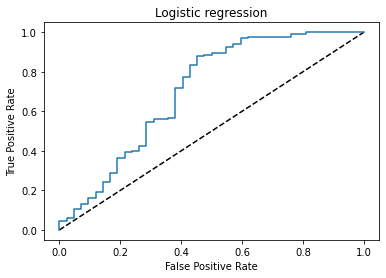

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression')
plt.show()

In [76]:
Auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [77]:
Auc_score

0.6834415584415585

Its a pretty decent score while predicting on whether to give a customer loan or not.

Grid search

In [78]:
from sklearn.model_selection import GridSearchCV
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()
gnbcv = GridSearchCV(gnb, parameters)
gnbcv.fit(x_train, y_train)

print(gnbcv.best_params_)

{'var_smoothing': 0.1873817422860384}


In [79]:
gnb=GaussianNB(var_smoothing=0.18738174228)

In [80]:
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)
predgnb = gnb.predict(x_test)
data = [predgnb, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
Predicted,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
Actual,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [81]:
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
print('Calssification Report is: ',classification_report(y_test,predict))
print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
print('\n\n')

Errors:


Accuracy score for the training :  0.8163771712158809
Accuracy score for the model is:  0.8218390804597702
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.74      0.40      0.52        42
         1.0       0.83      0.95      0.89       132

    accuracy                           0.82       174
   macro avg       0.79      0.68      0.71       174
weighted avg       0.81      0.82      0.80       174

Confusion Matrix is:  [[ 17  25]
 [  6 126]]





In [82]:
joblib.dump(lr, 'loangnb.obj')

['loangnb.obj']